In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from matplotlib.ticker import MaxNLocator

In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
aux = train_test_split(X_train, y_train, test_size=0.3,stratify=y_train, random_state=1)

In [5]:
X_train, X_val, y_train, y_val = aux

In [6]:
def muestras_estadisticas(y,title,xlabel=""):
    clases,counts = np.unique(y,return_counts=True)
    plt.figure(figsize=(6,1.5))
    plt.bar(clases,counts)
    plt.title(title,fontsize=16)
    if xlabel:
        plt.xlabel(xlabel,fontsize=14)
    plt.ylabel("# casos",fontsize=14)
    plt.xticks(clases)
    plt.show()
    

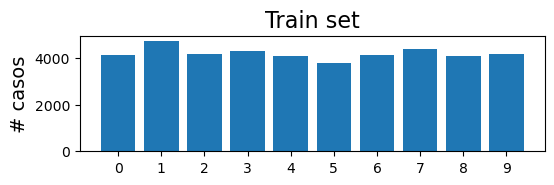

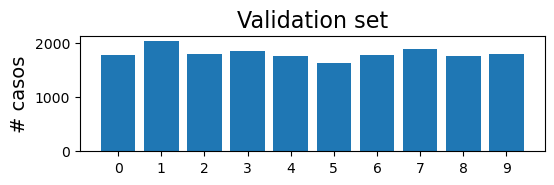

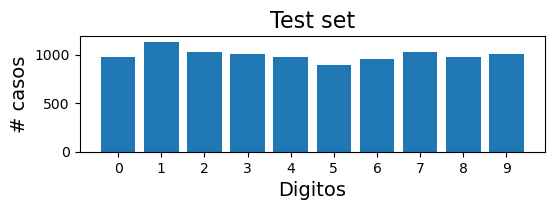

In [7]:
muestras_estadisticas(y_train,"Train set")
muestras_estadisticas(y_val,"Validation set")
muestras_estadisticas(y_test,"Test set","Digitos")

In [8]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(42000, 28, 28)
(18000, 28, 28)
(10000, 28, 28)


In [9]:
for x in (X_train, X_val, X_test):
    print(x.min(), x.max())

0 255
0 255
0 255


In [10]:
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

In [11]:
def plot_image(img,cmap='binary'):
    plt.imshow(img,cmap=cmap)
    plt.axis("off")

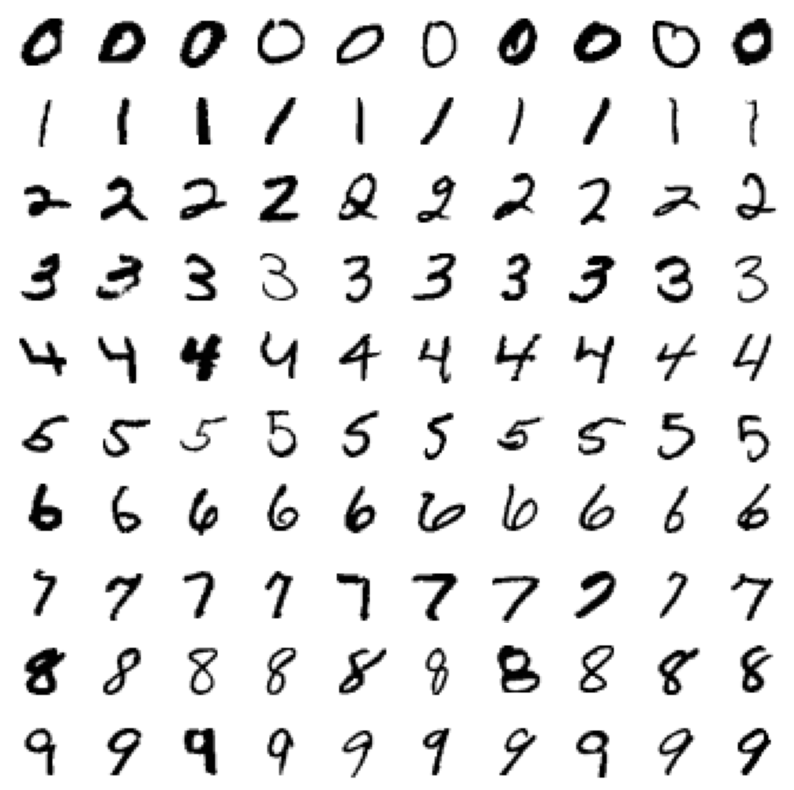

In [12]:
plt.figure(figsize=(10,10))
i=1
for clase in range(10):
    indices = np.where(y_train==clase)[0][:10]
    for indice in indices:
        plt.subplot(10,10,i)
        plt.imshow(X_train[indice],cmap='gray_r')
        plt.axis('off')
        i+=1

In [13]:
model = keras.Sequential([
    layers.Input(shape=(28, 28,1)),
    layers.Conv2D(filters=4, kernel_size=(3, 3), activation='relu',name="Convolucional_1"),
    layers.MaxPool2D(pool_size=(2, 2),name="MaxPooling_1"),
    layers.Conv2D(filters=8, kernel_size=(3, 3), activation='relu',name="Convolucional_2"),
    layers.MaxPool2D(pool_size=(2, 2),name="MaxPooling_2"),
    layers.Flatten(name="Aplanado"),
    layers.Dense(units=16, activation='relu',name="Densa_Oculta"),
    layers.Dense(units=10, activation='softmax',name="Salida")
])

In [14]:
model.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Convolucional_1 (Conv2D)        │ (None, 26, 26, 4)      │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling_1 (MaxPooling2D)     │ (None, 13, 13, 4)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Convolucional_2 (Conv2D)        │ (None, 11, 11, 8)      │           296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPooling_2 (MaxPooling2D)     │ (None, 5, 5, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Aplanado (Flatten)              │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Densa_Oculta (Dense)            │ (None, 16)             │         3,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Salida (Dense)                  │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,722 (14.54 KB)

 Trainable params: 3,722 (14.54 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
lista_callbacks=[
    keras.callbacks.ModelCheckpoint(filepath="best_model.keras",monitor='val_loss',save_best_only=True),
    keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=5)
]

In [17]:
historia = model.fit(X_train,y_train,epochs=50,batch_size=64,callbacks=lista_callbacks,validation_data=(X_val,y_val))

Epoch 1/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5717 - loss: 1.3290 - val_accuracy: 0.9130 - val_loss: 0.2813
Epoch 2/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9323 - loss: 0.2271 - val_accuracy: 0.9502 - val_loss: 0.1657
Epoch 3/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9536 - loss: 0.1576 - val_accuracy: 0.9577 - val_loss: 0.1350
Epoch 4/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9599 - loss: 0.1304 - val_accuracy: 0.9642 - val_loss: 0.1179
Epoch 5/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9684 - loss: 0.1075 - val_accuracy: 0.9653 - val_loss: 0.1154
Epoch 6/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9679 - loss: 0.1024 - val_accuracy: 0.9729 - val_loss: 0.0919
Epoch 7/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9728 - loss: 0.0865 - val_accuracy: 0.9736 - val_loss: 0.0864
Epoch 8/50
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9763 - loss: 0.0785 - val_accuracy: 0.

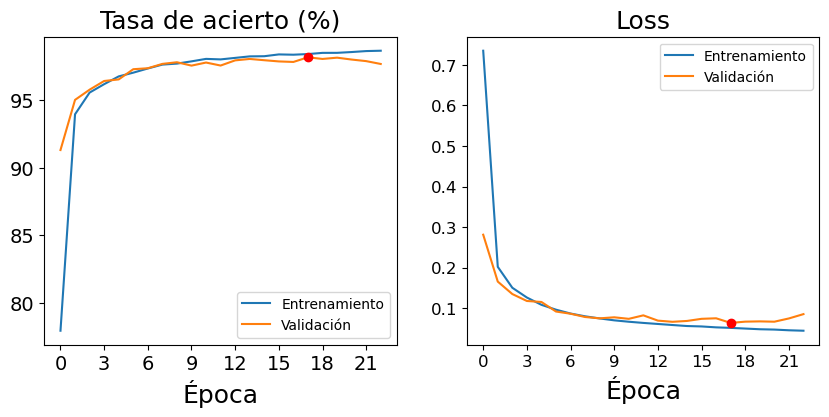

In [18]:
f = plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
h = historia.history
mejor_epoca = np.argmin(h['val_loss'])
plt.plot(100*np.array(h['accuracy']),label='Entrenamiento')
plt.plot(100*np.array(h['val_accuracy']),label='Validación')
plt.plot(mejor_epoca,100*h['val_accuracy'][mejor_epoca],'or')
plt.title('Tasa de acierto (%)',fontsize=18)
plt.xlabel('Época',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend()
f.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.subplot(1,2,2)
plt.plot(h['loss'],label='Entrenamiento')
plt.plot(h['val_loss'],label='Validación')
mejor_epoca = np.argmin(h['val_loss'])
plt.plot(mejor_epoca,h['val_loss'][mejor_epoca],'or')
plt.title('Loss',fontsize=18)
plt.xlabel('Época',fontsize=18)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
f.gca().xaxis.set_major_locator(MaxNLocator(integer=True))

In [28]:
model = keras.models.load_model("best_model.keras")

In [22]:
model.predict(X_test[:2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([[2.8216903e-08, 4.0029524e-10, 3.0253993e-06, 3.0405487e-05,
        1.7733001e-10, 2.0060436e-09, 7.3545998e-17, 9.9996567e-01,
        1.1731569e-08, 9.6081044e-07],
       [1.2860951e-05, 5.4661666e-07, 9.9998605e-01, 4.2610759e-07,
        2.1556896e-13, 3.6999969e-11, 8.1280902e-09, 1.7171648e-13,
        9.4844346e-08, 8.8507222e-12]], dtype=float32)

In [24]:
y_train_pred = np.argmax(model.predict(X_train),axis=1)
acc_train = 100*np.mean(y_train_pred == y_train)
print(f'Accuracy en el conjunto de entrenamiento: {acc_train:.2f}%')

1313/1313 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Accuracy en el conjunto de entrenamiento: 98.60%


In [25]:
y_val_pred = np.argmax(model.predict(X_val),axis=1)
acc_val = 100*np.mean(y_val_pred == y_val)
print(f'Accuracy en el conjunto de validación: {acc_val:.2f}%')

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy en el conjunto de validación: 98.17%


In [26]:
y_test_pred = np.argmax(model.predict(X_test),axis=1)
acc_test = 100*np.mean(y_test_pred == y_test)
print(f'Accuracy en el conjunto de test: {acc_test:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Accuracy en el conjunto de test: 98.20%


In [31]:
model.inputs

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=input_layer>]

Entrada: 


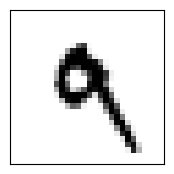

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Salida de la capa Convolucional_1: (4 canales)


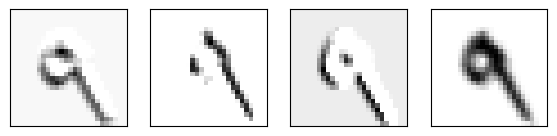

Salida de la capa MaxPooling_1: (4 canales)


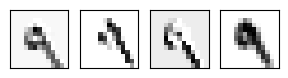

Salida de la capa Convolucional_2: (8 canales)


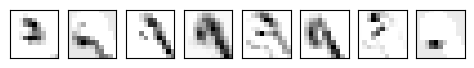

Salida de la capa MaxPooling_2: (8 canales)


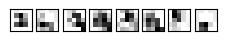

In [32]:
i=7
ejemplo = X_test[i:(i+1)]
print('Entrada: ')
plt.figure(figsize=(2,2))
plt.imshow(ejemplo[0],cmap='gray_r')
plt.xticks([])
plt.yticks([])
plt.show()
salidas_capas = [capa.output for capa in model.layers[:4]]
nombres_capas = [capa.name for capa in model.layers[:4]]
model_aux = keras.models.Model(inputs=model.inputs,outputs=salidas_capas)
activaciones = model_aux.predict(ejemplo)
for a,nom in zip(activaciones,nombres_capas):
    s = a.shape[1]/15
    n_canales = a.shape[-1]
    print(f'Salida de la capa {nom}: ({n_canales} canales)')
    plt.figure(figsize=(s*n_canales,s))
    for i in range(n_canales):
        plt.subplot(1,n_canales,i+1)
        plt.imshow(a[0,:,:,i],cmap='gray_r')
        plt.xticks([])
        plt.yticks([])
    plt.show()